<a href="https://colab.research.google.com/github/roulupen/deeplib/blob/master/notebooks/Assignment_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Assignment - 15***

Work on the your own library now:
1. Convert your code such that you have 4 additional files in 4 folders:
    - data
    - loss
    - model
optim_scheduler
2. Use these files to import related functions to train your model. Your ipynb files can only have training loop, and everything else must be imported. Look at this COMPLEX reference: https://github.com/rwightman/pytorch-image-models/tree/master/timm (Links to an external site.)

***Team Member***:

*   Upendra Roul
*   Amit Doda



In [1]:
import numpy as np
import time, math
from tqdm import tqdm_notebook as tqdm

import tensorflow as tf
import tensorflow.contrib.eager as tfe

tf.enable_eager_execution()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [2]:
!git clone -q https://github.com/roulupen/deeplib.git
import deeplib as dl

Using TensorFlow backend.


In [0]:
BATCH_SIZE =  128#@param {type:"integer"}
MOMENTUM = 0.9 #@param {type:"number"}
LEARNING_RATE = 0.4 #@param {type:"number"}
WEIGHT_DECAY = 5e-4 #@param {type:"number"}
EPOCHS =  24#@param {type:"integer"}

In [4]:
data_set = dl.DataSet()
train_file, test_file = data_set.get_tf_records('cifar10')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at ../content/drive/


In [5]:
len_train = dl.get_tf_record_count(train_file)
len_test = dl.get_tf_record_count(test_file)
print(len_train, len_test)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
50000 10000


In [0]:
model = dl.DavidNet()
global_step = tf.train.get_or_create_global_step()
lr = dl.OneCycleLR(EPOCHS, LEARNING_RATE, BATCH_SIZE, len_train)
lr_fun = lr.get_lr_fun(global_step)

opt = tf.train.MomentumOptimizer(lr_fun, momentum=MOMENTUM, use_nesterov=True)

In [7]:
t = time.time()

# Keep results for plotting
train_loss_results = []
test_loss_results = []
train_accuracy_results = []
test_accuracy_results = []

for epoch in range(EPOCHS):
  train_loss = test_loss = train_acc = test_acc = 0.0
  train_set = dl.input_fn(train_file, BATCH_SIZE)
  
  tf.keras.backend.set_learning_phase(1)
  for (x, y) in tqdm(train_set):
    with tf.GradientTape() as tape:
      loss, correct = model(x, y)

    var = model.trainable_variables
    grads = tape.gradient(loss, var)
    for g, v in zip(grads, var):
      g += v * WEIGHT_DECAY * BATCH_SIZE
    opt.apply_gradients(zip(grads, var), global_step=global_step)

    train_loss += loss.numpy()
    train_acc += correct.numpy()
  
  tf.keras.backend.set_learning_phase(0)
  test_set = dl.input_fn(file_names = test_file, batch_size = BATCH_SIZE, is_train_file = False)
  for (x, y) in test_set:
    loss, correct = model(x, y)
    test_loss += loss.numpy()
    test_acc += correct.numpy()

  train_loss_results.append(train_loss / len_train)
  test_loss_results.append(test_loss / len_test)

  train_accuracy_results.append(train_acc / len_train)
  test_accuracy_results.append(test_acc / len_test)
  
  print('epoch:', epoch+1, 'lr:', lr.get_lr() , 'train loss:', train_loss / len_train, 'train acc:', train_acc / len_train, 'val loss:', test_loss / len_test, 'val acc:', test_acc / len_test, 'time:', time.time() - t)




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.



epoch: 1 lr: 0.07979539641943734 train loss: 1.375762817993164 train acc: 0.5015 val loss: 0.9210863325119019 val acc: 0.6711 time: 78.60422420501709



epoch: 2 lr: 0.15979539641943735 train loss: 0.8508396768951416 train acc: 0.69922 val loss: 1.0385106685638428 val acc: 0.6617 time: 141.32820391654968



epoch: 3 lr: 0.23979539641943734 train loss: 0.716237184753418 train acc: 0.7513 val loss: 0.9952789173126221 val acc: 0.6902 time: 204.02036714553833



epoch: 4 lr: 0.3197953964194373 train loss: 0.6208049062347412 train acc: 0.78638 val loss: 0.7367280149459838 val acc: 0.7702 time: 267.0842182636261



epoch: 5 lr: 0.39979539641943734 train loss: 0.5401603681945801 train acc: 0.81258 val loss: 0.6014554166316987 val acc: 0.8018 time: 329.85398960113525



epoch: 6 lr: 0.37900121146856913 train loss: 0.4648186192321777 train acc: 0.83848 val loss: 0.4371479786872864 val acc: 0.8512 time: 392.90799021720886



epoch: 7 lr: 0.3579485798896218 train loss: 0.39616907585144046 train acc: 0.86202 val loss: 0.4262570690155029 val acc: 0.8594 time: 455.99409651756287



epoch: 8 lr: 0.33689594831067443 train loss: 0.3465246601104736 train acc: 0.87954 val loss: 0.38867215533256533 val acc: 0.8709 time: 519.3517489433289



epoch: 9 lr: 0.31584331673172705 train loss: 0.30326024517059325 train acc: 0.89402 val loss: 0.42079127182960513 val acc: 0.8641 time: 582.0632197856903



epoch: 10 lr: 0.2947906851527797 train loss: 0.26529214838027954 train acc: 0.90718 val loss: 0.3805530036449432 val acc: 0.8767 time: 644.8513898849487



epoch: 11 lr: 0.2737380535738323 train loss: 0.2378670994949341 train acc: 0.9172 val loss: 0.3953580532073975 val acc: 0.8759 time: 707.6048414707184



epoch: 12 lr: 0.252685421994885 train loss: 0.2091982164001465 train acc: 0.92622 val loss: 0.3740061249256134 val acc: 0.8852 time: 770.494735956192



epoch: 13 lr: 0.23163279041593757 train loss: 0.17670085020065307 train acc: 0.93848 val loss: 0.3481587698459625 val acc: 0.8925 time: 833.3826794624329



epoch: 14 lr: 0.21058015883699022 train loss: 0.15557399237632752 train acc: 0.94546 val loss: 0.33601725931167603 val acc: 0.8931 time: 895.7054431438446



epoch: 15 lr: 0.18952752725804284 train loss: 0.13606839762687684 train acc: 0.952 val loss: 0.35464404220581053 val acc: 0.8932 time: 957.9678208827972



epoch: 16 lr: 0.16847489567909546 train loss: 0.11720907967567444 train acc: 0.95854 val loss: 0.36413137731552125 val acc: 0.8946 time: 1020.4860033988953



epoch: 17 lr: 0.14742226410014808 train loss: 0.100973259973526 train acc: 0.965 val loss: 0.3307984289169312 val acc: 0.9036 time: 1083.1603424549103



epoch: 18 lr: 0.1263696325212007 train loss: 0.08666022318840026 train acc: 0.96982 val loss: 0.31524699335098266 val acc: 0.9091 time: 1146.2459120750427



epoch: 19 lr: 0.10531700094225332 train loss: 0.06945675181865692 train acc: 0.97594 val loss: 0.3195292567253113 val acc: 0.91 time: 1208.6751492023468



epoch: 20 lr: 0.08426436936330595 train loss: 0.06038543786764145 train acc: 0.97964 val loss: 0.3094683298587799 val acc: 0.9125 time: 1271.3454723358154



epoch: 21 lr: 0.06321173778435857 train loss: 0.05199181530237198 train acc: 0.983 val loss: 0.3047870098114014 val acc: 0.9169 time: 1334.2957084178925



epoch: 22 lr: 0.042159106205411245 train loss: 0.042863634077310565 train acc: 0.98552 val loss: 0.29777472853660586 val acc: 0.9177 time: 1396.8588993549347



epoch: 23 lr: 0.021106474626463867 train loss: 0.03730004093408584 train acc: 0.98866 val loss: 0.3018877763271332 val acc: 0.9166 time: 1459.754000902176



epoch: 24 lr: 5.384304751648861e-05 train loss: 0.034064363107681274 train acc: 0.98898 val loss: 0.29701972784996034 val acc: 0.9177 time: 1522.4917435646057


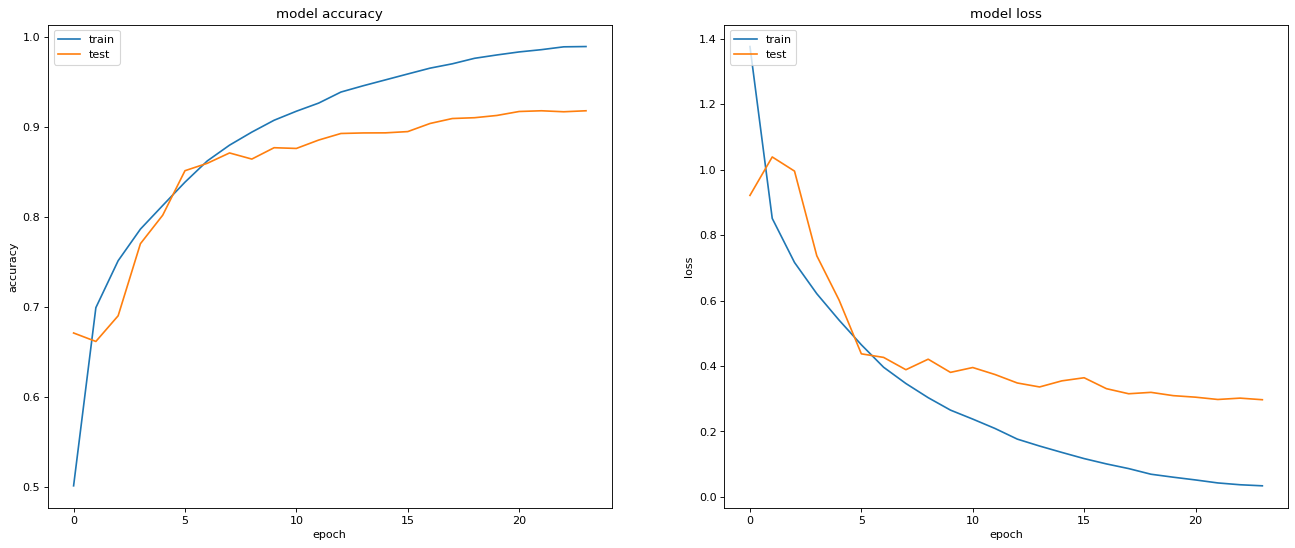

Best accuracy: 0.9177


In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')

# summarize history for accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracy_results)
plt.plot(test_accuracy_results)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(train_loss_results)
plt.plot(test_loss_results)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('Best accuracy: {}'.format(np.amax(test_accuracy_results)))